In [1]:
import sys
sys.path.append("../../")

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import torch
import pyro
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
from tqdm.auto import tqdm
from _dmm import DMM
from utils import StockDataset
from torch.utils.data import DataLoader
from pyro.infer import SVI, Trace_ELBO, Predictive

In [3]:
# set style of graphs
plt.style.use('ggplot')
from pylab import rcParams
plt.rcParams['figure.dpi'] = 100

In [4]:
df = pd.read_csv('../../stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how="any")
X_train, X_test = train_test_split(df, test_size=0.1, shuffle=False)

In [5]:
X_train.shape

(1359, 6)

In [6]:
X_test['Close'].shape

(151,)

In [7]:
predictor = DMM()
predictor.fit(X_train, batch_size=24, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1, Loss: 21502.964454301768
Epoch 2, Loss: 13131.913038445371
Epoch 3, Loss: 2732.2957042487606
Epoch 4, Loss: 1301.6403550878167
Epoch 5, Loss: 815.6956542783549
Epoch 5, Val Loss 67.01615397135417
Epoch 6, Loss: 446.93975824543406
Epoch 7, Loss: 269.7733180852873
Epoch 8, Loss: 137.31973136109966
Epoch 9, Loss: 35.791609421372414
Epoch 10, Loss: -27.650687405041285
Epoch 10, Val Loss 38.815755208333336


In [8]:
y_pred = predictor.predict(X_test)

In [9]:
y_pred.shape

(151, 1)

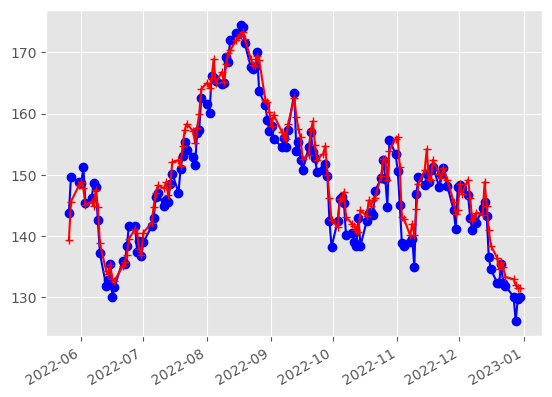

In [10]:
y_test = (X_test['Close']).values 
days = np.array(X_test.index, dtype="datetime64[ms]")
            
fig = plt.figure()
            
axes = fig.add_subplot(111)
axes.plot(days, y_test, 'bo-', label="actual") 
axes.plot(days, y_pred, 'r+-', label="predicted")
            
fig.autofmt_xdate()
            
# plt.legend()
plt.show()

In [11]:
sample = predictor.sample(151)

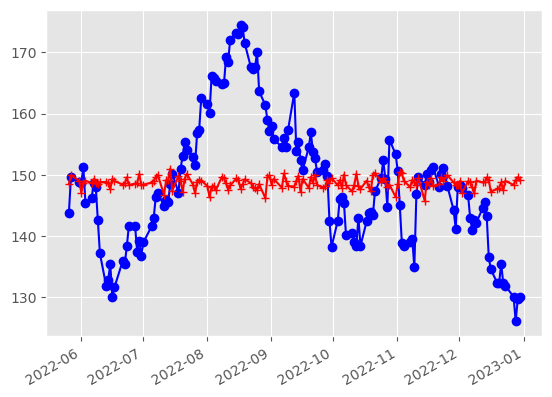

In [12]:
y_test = (X_test['Close']).values 
days = np.array(X_test.index, dtype="datetime64[ms]")
            
fig = plt.figure()
            
axes = fig.add_subplot(111)
axes.plot(days, y_test, 'bo-', label="actual") 
axes.plot(days, sample, 'r+-', label="predicted")
            
fig.autofmt_xdate()
            
# plt.legend()
plt.show()